In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
import scipy.stats as st



In [2]:
df=pd.read_csv("A.csv")
df.head()

,ticker,name,date,open,high,low,close,adjusted close,volume
0,A,"Agilent Technologies, Inc. Common Stock",2021-01-04 09:30:00-05:00,119.010002,120.089996,118.800003,120.019997,120.019997,0
1,A,"Agilent Technologies, Inc. Common Stock",2021-01-04 10:30:00-05:00,120.019997,120.029999,118.410004,118.860001,118.860001,341376
2,A,"Agilent Technologies, Inc. Common Stock",2021-01-04 11:30:00-05:00,118.839996,118.867996,117.269997,117.570000,117.570000,108887
3,A,"Agilent Technologies, Inc. Common Stock",2021-01-04 12:30:00-05:00,117.500000,118.260002,117.110001,118.099998,118.099998,90501
4,A,"Agilent Technologies, Inc. Common Stock",2021-01-04 13:30:00-05:00,118.120003,118.169998,117.750000,118.000000,118.000000,114713


In [3]:
df=df.drop(['ticker','name','date'],axis=1)
df.head()

,open,high,low,close,adjusted close,volume
0,119.010002,120.089996,118.800003,120.019997,120.019997,0
1,120.019997,120.029999,118.410004,118.860001,118.860001,341376
2,118.839996,118.867996,117.269997,117.570000,117.570000,108887
3,117.500000,118.260002,117.110001,118.099998,118.099998,90501
4,118.120003,118.169998,117.750000,118.000000,118.000000,114713


Text(0.5, 0, 'volume')

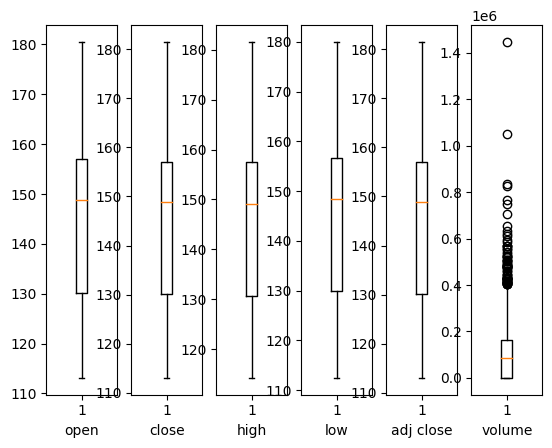

In [4]:
df.shape
df.isna().sum()
plt.subplot(1,6,1)
plt.boxplot(df["open"])
plt.xlabel("open")
plt.subplot(1,6,2)
plt.boxplot(df["close"])
plt.xlabel("close")
plt.subplot(1,6,3)
plt.boxplot(df["high"])
plt.xlabel("high")
plt.subplot(1,6,4)
plt.boxplot(df["low"])
plt.xlabel("low")
plt.subplot(1,6,5)
plt.boxplot(df["adjusted close"])
plt.xlabel("adj close")
plt.subplot(1,6,6)
plt.boxplot(df["volume"])
plt.xlabel("volume")

In [5]:
df.describe()

,open,high,low,close,adjusted close,volume
count,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3.006000e+03
mean,145.475267,145.877870,145.055489,145.465087,145.465087,1.020440e+05
std,16.709076,16.750725,16.648883,16.694843,16.694843,1.218376e+05
min,113.110001,114.199303,112.440000,113.010002,113.010002,0.000000e+00
25%,130.210002,130.555004,130.000000,130.149995,130.149995,0.000000e+00
50%,148.849149,149.022502,148.491203,148.830000,148.830000,8.365500e+04
75%,157.013750,157.567505,156.540000,157.000000,157.000000,1.617968e+05
max,180.500000,181.590000,179.970000,181.500000,181.500000,1.446943e+06


In [6]:
df.corr()

,open,high,low,close,adjusted close,volume
open,1.000000,0.999336,0.999043,0.999034,0.999034,-0.081480
high,0.999336,1.000000,0.998398,0.999237,0.999237,-0.074872
low,0.999043,0.998398,1.000000,0.999190,0.999190,-0.087450
close,0.999034,0.999237,0.999190,1.000000,1.000000,-0.081147
adjusted close,0.999034,0.999237,0.999190,1.000000,1.000000,-0.081147
volume,-0.081480,-0.074872,-0.087450,-0.081147,-0.081147,1.000000


In [7]:
df=df.drop(["volume","adjusted close"],axis=1)


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
data_normalized = scaler_minmax.fit(df)
data_normalized = pd.DataFrame(data_normalized.transform(df),columns=df.columns)
data_normalized.describe()

,open,high,low,close
count,3006.000000,3006.000000,3006.000000,3006.000000
mean,0.480268,0.470073,0.482978,0.473866
std,0.247946,0.248561,0.246541,0.243756
min,0.000000,0.000000,0.000000,0.000000
25%,0.253747,0.242700,0.260033,0.250255
50%,0.530333,0.516736,0.533855,0.522996
75%,0.651488,0.643534,0.653043,0.642284
max,1.000000,1.000000,1.000000,1.000000


In [9]:
def database(dataset,time=1):
    x,y=[],[]
    for i in range(int(dataset.shape[0])-time-1):
        temp_x=[]        
        for j in dataset.columns:
            
            
            temp_x.append(dataset[j].iloc[i:i+time])
            
        x.append(np.array(temp_x).transpose())
        y.append([dataset["close"].iloc[i+time]])
    return np.array(x),np.array(y)


In [10]:
train_size=int(len(data_normalized)*0.70)
test_size=len(data_normalized)-train_size
train_data,test_data=data_normalized.iloc[0:train_size,:],data_normalized.iloc[train_size:len(df),:]
print(train_data.columns)
print(test_data["close"])

Index(['open', 'high', 'low', 'close'], dtype='object')
2104    0.833114
2105    0.851803
2106    0.851657
2107    0.858812
2108    0.832092
          ...   
3001    0.706016
3002    0.710615
3003    0.709885
3004    0.697912
3005    0.698934
Name: close, Length: 902, dtype: float64


In [11]:
train_x,train_y=database(train_data,100)
test_x,test_y=database(test_data,100)
print(train_x[0][0:5])
print(train_data[0:5])


[[0.08755011 0.08741108 0.09418041 0.10235063]
 [0.10253741 0.08652079 0.08840521 0.08541391]
 [0.08502739 0.06927801 0.07152372 0.06657903]
 [0.06514319 0.06025608 0.06915446 0.07431737]
 [0.07434341 0.05892053 0.07863172 0.07285732]]
       open      high       low     close
0  0.087550  0.087411  0.094180  0.102351
1  0.102537  0.086521  0.088405  0.085414
2  0.085027  0.069278  0.071524  0.066579
3  0.065143  0.060256  0.069154  0.074317
4  0.074343  0.058921  0.078632  0.072857


In [12]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2003, 100, 4)
(2003, 1)
(801, 100, 4)
(801, 1)


In [13]:
train_x[0].shape

(100, 4)

In [14]:
model=Sequential()
model.add(LSTM(50,input_shape=(100,4),return_sequences=True))
model.add(LSTM(30,return_sequences=False))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           11000     
                                                                 
 lstm_1 (LSTM)               (None, 30)                9720      
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 20751 (81.06 KB)
Trainable params: 20751 (81.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/5

41/41 [==============================] - 7s 77ms/step - loss: 0.0160 - val_loss: 8.5777e-04
Epoch 2/5
41/41 [==============================] - 3s 65ms/step - loss: 5.0843e-04 - val_loss: 8.1681e-04
Epoch 3/5
41/41 [==============================] - 2s 59ms/step - loss: 3.8738e-04 - val_loss: 7.9719e-04
Epoch 4/5
41/41 [==============================] - 2s 51ms/step - loss: 3.6471e-04 - val_loss: 9.2775e-04
Epoch 5/5
41/41 [==============================] - 3s 68ms/step - loss: 3.4841e-04 - val_loss: 7.4961e-04


<function matplotlib.pyplot.legend(*args, **kwargs)>

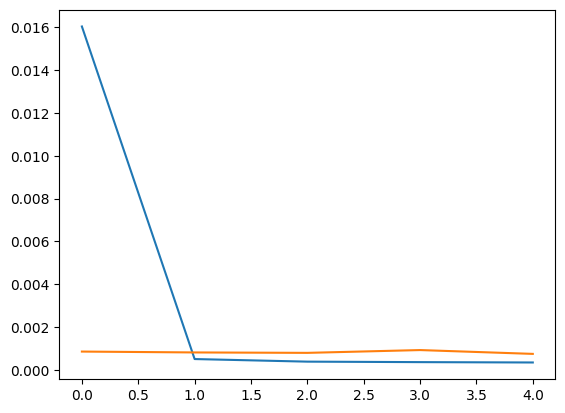

In [15]:
store=model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=5,batch_size=50,verbose=1)
plt.plot(store.history["loss"],label="training loss")
plt.plot(store.history["val_loss"],label="validation loss")
plt.legend

63/63 [==============================] - 2s 24ms/step


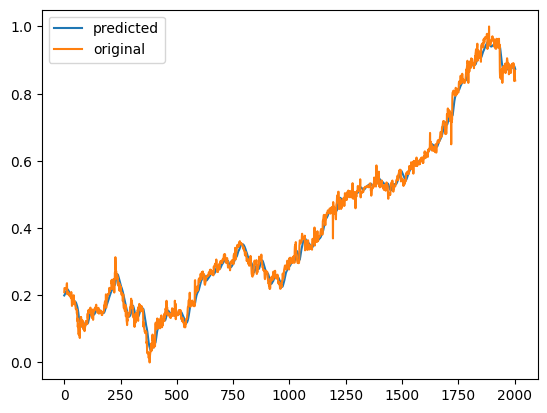

In [19]:
pre=model.predict(train_x)
pre.shape
plt.plot(pre,label="predicted")
plt.plot(train_y,label="original")
plt.legend()

26/26 [==============================] - 1s 24ms/step


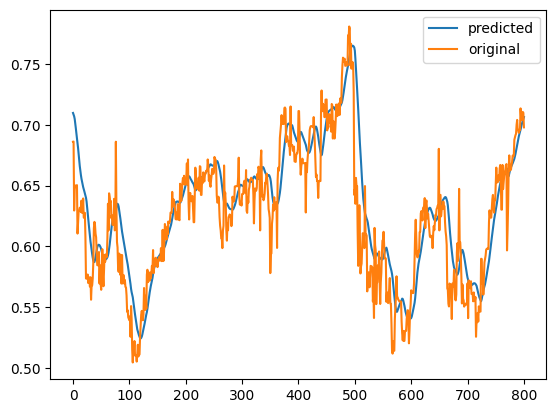

In [20]:
pre_test=model.predict(test_x)
plt.plot(pre_test,label="predicted")
plt.plot(test_y,label="original")
plt.legend()

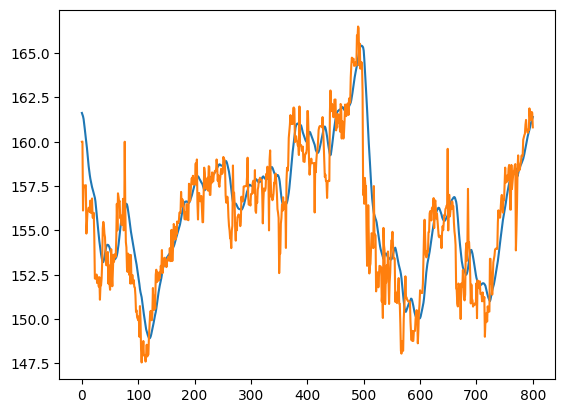

In [29]:
out=np.repeat(pre_test,4,axis=1)
out=pd.DataFrame(scaler_minmax.inverse_transform(out))
out2=np.repeat(test_y,4,axis=1)
out2=pd.DataFrame(scaler_minmax.inverse_transform(out2))
plt.plot(out[3])
plt.plot(out2[3])
